In [1]:
import json
import py.myutils as my
import importlib
importlib.reload(my)
import json
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Patch, Rectangle
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors
import matplotlib.cm as cm
import matplotlib.patheffects as path_effects
from matplotlib.ticker import MaxNLocator
from matplotlib import rc


# plt.rcParams["font.family"] = "serif"
# plt.rcParams["mathtext.fontset"] = "dejavuserif"

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)


In [2]:
recalculate = recompile = True

In [17]:
recalculate = recompile = False

~~~ cpp/integration_error.cpp is executed ~~~
~~~  parameters: {"b": 0.25, "c": -0.125, "d": -1, "v": 2, "tau": 1, "h_l": 0.001, "h_r": 1, "h_n": 2000, "T": 50, "order": 2} ~~~


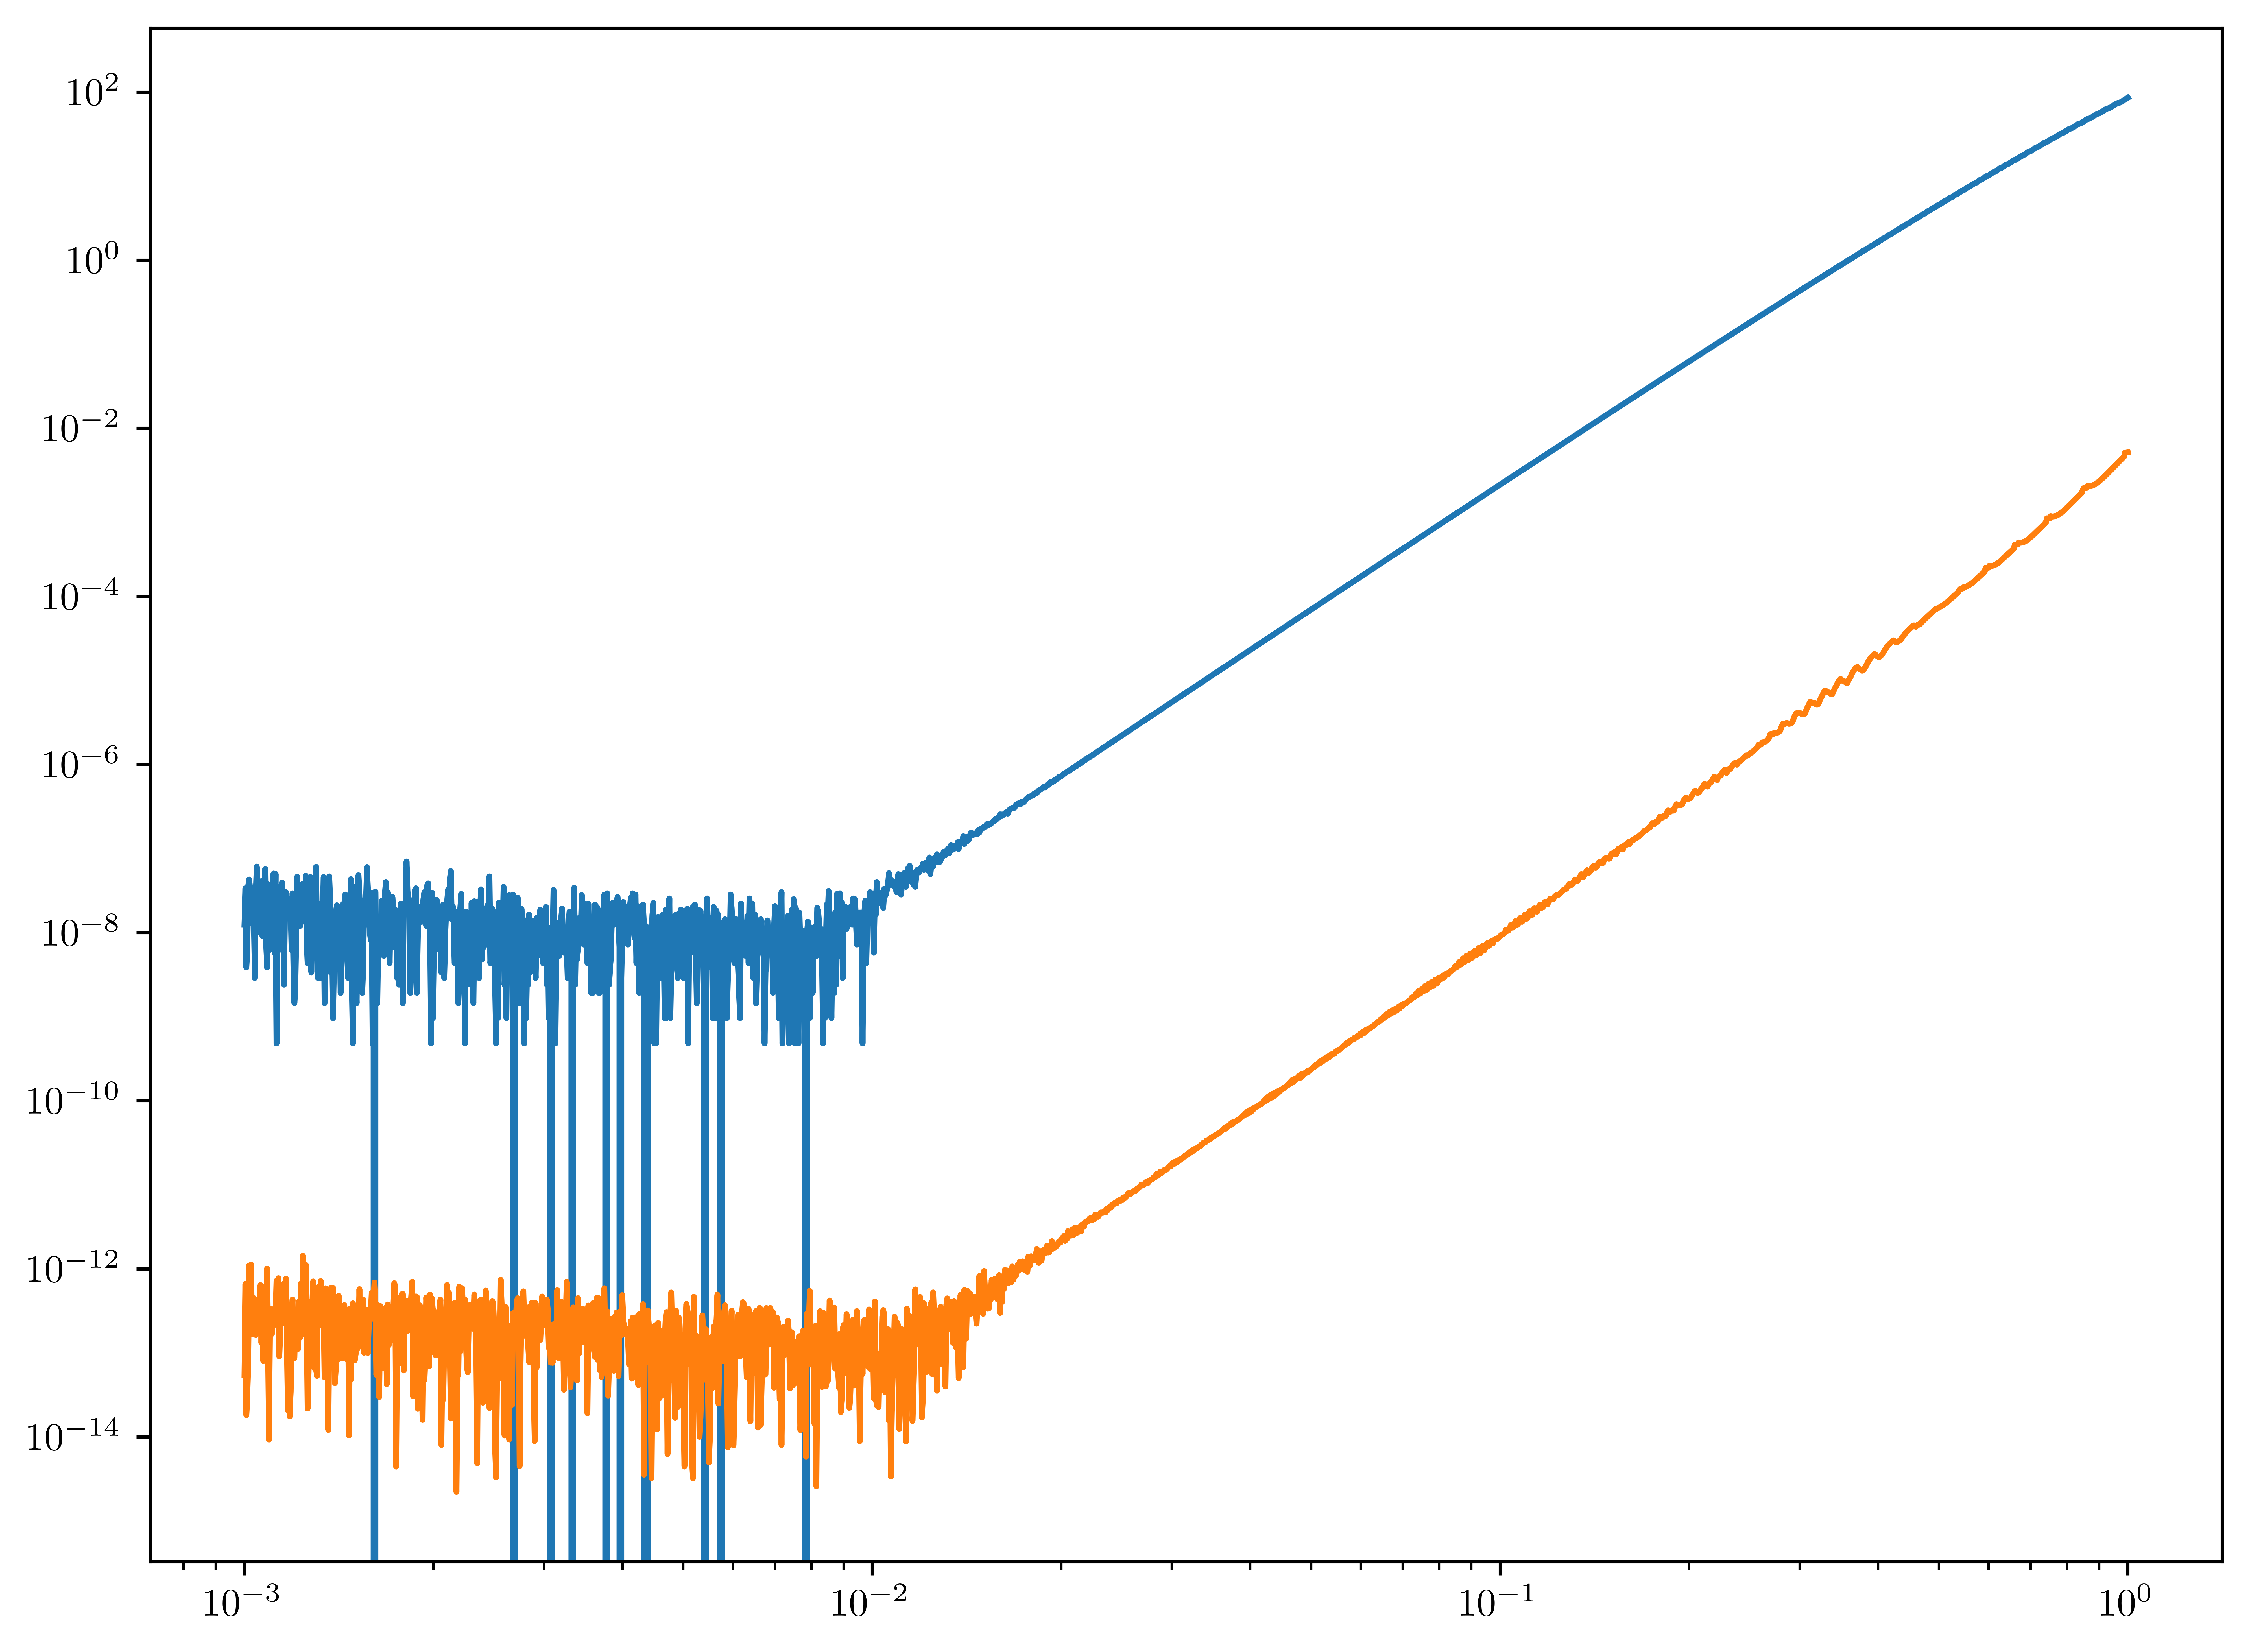

In [16]:
# x'' + b x' + c x = d * sign(x (t - T) )

# b = -0.2; c = 1; d = c; v = 2; T = 1
# b = 0.2; c = 1; d = -c; v = 2; T = 1
# params = dict(
#  b = -0.2,
#  c = 1, d = 1, v = 2, tau = 1,
#     h=0.01, T = 20000
# )

params = dict(
 b = 0.25,
 c = -0.125, d = -1, v = 2, tau = 1,
 h_l=0.001, h_r = 1, h_n = 2000,
 T = 50, order = 2,
)

script = "integration_error"
prefix = script
params_str = json.dumps(params)
filename = prefix + " " + params_str
filename = filename[:min(len(filename), 200)]
if recalculate or not os.path.isfile(filename_bin):
    my.run_cpp(script, params=params_str, recompile=recompile)


filename_bin = f"output_bin/{filename}.h.bin"
h = my.get_binary(filename_bin)
filename_bin = f"output_bin/{filename}.error.bin"
error = my.get_binary(filename_bin)

fig, ax = plt.subplots(1,1, figsize=(8,6),dpi=1000)

plt.tight_layout()

for o in range(params["order"]):
    ax.plot(h, error[o])
    
ax.set_xscale('log')
ax.set_yscale('log')



plt.savefig(f"output_img/{filename}.jpg", format="jpg", dpi=1000)


In [149]:
LE1, LE2, LE_p

(0.17362602854810782, 0.00046201695236537936, 0.17207091249110257)

0.18457361535399547

<Axes: >

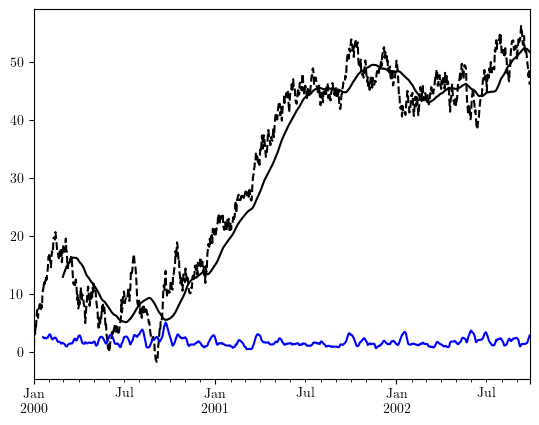

In [122]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000)).cumsum()

#plot the time series
ts.plot(style='k--')

# calculate a 60 day rolling mean and plot
ts.rolling(window=60).mean().plot(style='k')

# add the 20 day rolling standard deviation:
ts.rolling(window=20).std().plot(style='b')